In [1]:
# Paso 0: Importar libreria Pandas

import pandas as pd

In [2]:
# Paso 1: Importar el csv en un DF

df = pd.read_csv('ibex_coma.csv')

df = df.drop('Unnamed: 0',axis=1)

df

,id,ticker,empresa,date,open,high,low,close,adj close,volume,sector
0,1,ANA,Acciona,2019-01-02,"73,900002","73,900002","73,900002","73,900002","64,14827",0,construction
1,1,ANA,Acciona,2019-01-03,"74,199997","74,199997","74,199997","74,199997","64,408676",0,construction
2,1,ANA,Acciona,2019-01-04,"76,580002","76,580002","76,580002","76,580002","66,474617",0,construction
3,1,ANA,Acciona,2019-01-07,"76,980003","77,139999","75,860001","77,139999","66,960716",0,construction
4,1,ANA,Acciona,2019-01-08,"77,139999","78,400002","77,139999","78,239998","67,915558",0,construction
...,...,...,...,...,...,...,...,...,...,...,...
44000,35,UNI,Unicaja,2024-02-26,"0,968","0,9765","0,9635","0,972","0,972",4328467,banking
44001,35,UNI,Unicaja,2024-02-27,"0,972","0,9765","0,9675","0,975","0,975",3281814,banking
44002,35,UNI,Unicaja,2024-02-28,"0,978","0,9785","0,9635","0,9635","0,9635",3755004,banking
44003,35,UNI,Unicaja,2024-02-29,"0,9635","0,966","0,9385","0,9445","0,9445",11302071,banking


In [3]:
# Paso 2: Chequear el tipo de dato del DF

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44005 entries, 0 to 44004
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         44005 non-null  int64 
 1   ticker     44005 non-null  object
 2   empresa    44005 non-null  object
 3   date       44005 non-null  object
 4   open       44005 non-null  object
 5   high       44005 non-null  object
 6   low        44005 non-null  object
 7   close      44005 non-null  object
 8   adj close  44005 non-null  object
 9   volume     44005 non-null  int64 
 10  sector     44005 non-null  object
dtypes: int64(2), object(9)
memory usage: 3.7+ MB


In [4]:
# Paso 3: Modificar variables numéricas que tienen formato erróneo (string) 

columns_to_convert = ['open', 'high', 'low', 'close', 'adj close']

for column in columns_to_convert:
    df[column] = df[column].str.replace(',', '.').astype(float)

In [5]:
# Paso 4: Chequear que los cambios se han aplicado correctamente

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44005 entries, 0 to 44004
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         44005 non-null  int64  
 1   ticker     44005 non-null  object 
 2   empresa    44005 non-null  object 
 3   date       44005 non-null  object 
 4   open       44005 non-null  float64
 5   high       44005 non-null  float64
 6   low        44005 non-null  float64
 7   close      44005 non-null  float64
 8   adj close  44005 non-null  float64
 9   volume     44005 non-null  int64  
 10  sector     44005 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 3.7+ MB


In [6]:
# Paso 5: Analizar distribución del valor de apertura y cierre de la acción por sector

df.groupby(['sector',]).agg({'open': ['mean','std'],'close':['mean','std']}).round(2)

open         close       
               mean    std   mean    std
sector                                  
banking        2.93   1.91   2.93   1.91
construction  41.08  48.92  41.09  48.93
energy        18.63   6.72  18.64   6.71
high tech     34.43  25.55  34.42  25.56
insurance      1.94   0.34   1.94   0.34
pharma        30.74  16.42  30.71  16.44
real estate    8.70   2.00   8.69   2.00
resources     14.13   6.38  14.12   6.38
retail        27.85   4.59  27.86   4.60
telco         21.67  18.36  21.66  18.35
transport     81.17  62.79  81.11  62.78
travel         5.77   1.03   5.77   1.02

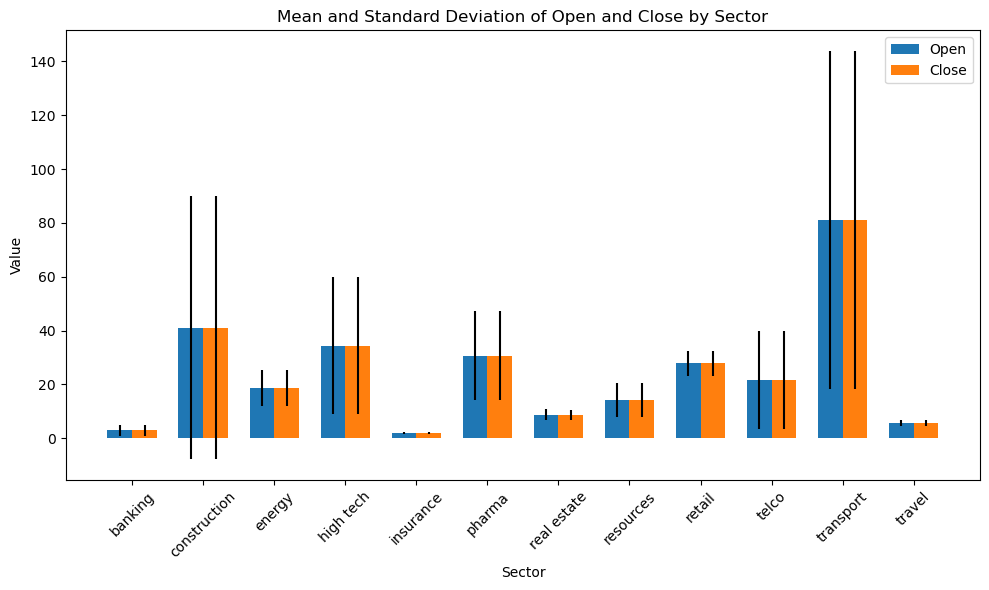

In [7]:
# Paso 6: Realizar un gráfico del groupby anterior

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt


grouped_data = df.groupby('sector').agg({'open': ['mean', 'std'], 'close': ['mean', 'std']}).round(2)

# Gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Estableciendo el ancho de las barras
bar_width = 0.35

# Índices para las barras
index = range(len(grouped_data))

# Datos para las barras
means_open = grouped_data['open']['mean']
stds_open = grouped_data['open']['std']
means_close = grouped_data['close']['mean']
stds_close = grouped_data['close']['std']

# Creando las barras
bars_open = ax.bar(index, means_open, bar_width, label='Open', yerr=stds_open)
bars_close = ax.bar([i + bar_width for i in index], means_close, bar_width, label='Close', yerr=stds_close)

# Etiquetas, título y leyenda
ax.set_xlabel('Sector')
ax.set_ylabel('Value')
ax.set_title('Mean and Standard Deviation of Open and Close by Sector')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(grouped_data.index)
ax.legend()

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
# Paso 5: Analizar distirbución del valor de cierre de la acción por empresa

df.groupby(['empresa',]).agg({'close': ['mean','std']}).round(2)


close       
                         mean    std
empresa                             
Acciona                131.85  35.20
Acciona Energia         32.00   5.25
Acerinox                 9.38   1.40
Aena                   142.60  17.57
Amadeus                 59.29   7.97
Arcelor                 20.90   6.37
BBVA                     5.20   1.48
Bankinter                4.77   1.09
Caixabank                2.87   0.67
Cellnex                 38.73   9.40
Colonial Inmobiliaria    7.86   1.87
Enagas                  19.57   2.81
Endesa                  20.75   2.32
Ferrovial               25.22   3.40
Fluidra                 18.59   7.86
Grifols                 19.92   6.93
Grupo ACS               28.12   5.99
Iberdrola               10.16   1.15
Inditex                 27.86   4.60
Indra                    9.56   2.31
Laboratorios Rovi       41.50  16.11
Logista                 19.63   3.23
Melia                    5.77   1.02
Merlin Properties        9.52   1.77
Naturgy                 23.60   3.64
REE                     16.87   1.48
Repsol                  12.07   2.66
Sabadell                 0.77   0.28
Sacyr                    2.30   0.43
Santander                3.10   0.64
Solaria                 13.96   5.46
Telefonica               4.59   1.36
Unicaja                  0.86   0.17
mapfre                   1.94   0.34

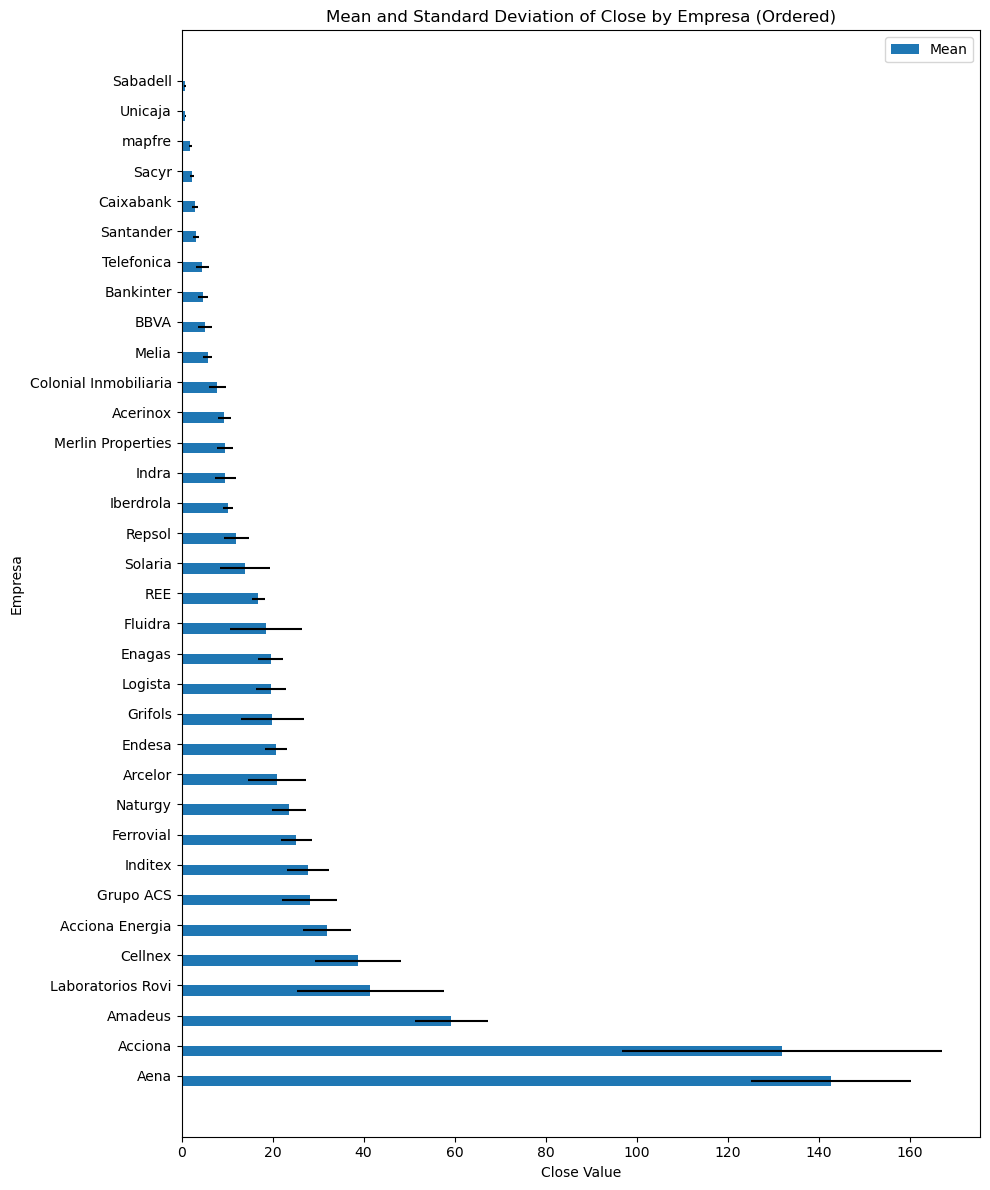

In [9]:
# Paso 6: Generar gráfico de barras para empresa


grouped_data = df.groupby('empresa').agg({'close': ['mean', 'std']}).round(2)

# Ordenar el DataFrame según las medias de 'close'
grouped_data_sorted = grouped_data.sort_values(by=('close', 'mean'), ascending=False)

# Gráfico de barras laterales con el eje y invertido
fig, ax = plt.subplots(figsize=(10, 12))

# Ancho de las barras
bar_width = 0.35

# Índices para las barras
index = range(len(grouped_data_sorted))

# Datos para las barras
means = grouped_data_sorted['close']['mean']
stds = grouped_data_sorted['close']['std']

# Crear barras para medias
bars_means = ax.barh(index, means, bar_width, xerr=stds, label='Mean')

# Etiquetas, título y leyenda
ax.set_ylabel('Empresa')
ax.set_xlabel('Close Value')
ax.set_title('Mean and Standard Deviation of Close by Empresa (Ordered)')
ax.set_yticks([i + bar_width / 2 for i in index])
ax.set_yticklabels(grouped_data_sorted.index)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

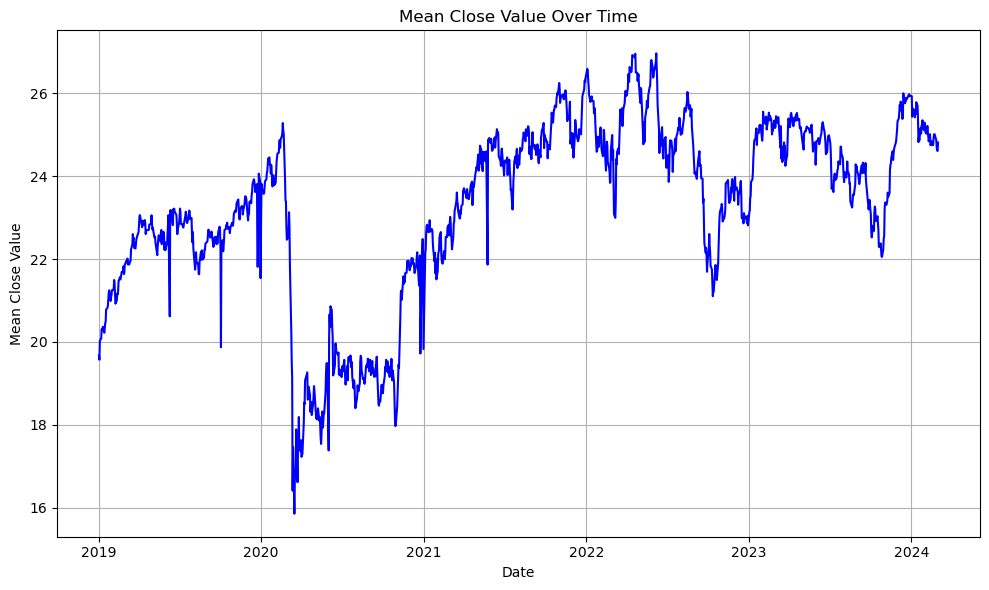

In [10]:
# Paso 7: Analizar le evolución temporal del valor de la acción en el Ibex35

df['date'] = pd.to_datetime(df['date'])

# Calcular la media de la columna 'close' por fecha
mean_close_by_date = df.groupby('date')['close'].mean()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(mean_close_by_date, color='blue', marker='None', linestyle='-')

# Configuración de etiquetas y título
plt.xlabel('Date')
plt.ylabel('Mean Close Value')
plt.title('Mean Close Value Over Time')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [11]:
# Paso 8: Analizar la distribución de empresas por sector

df.groupby('sector')['empresa'].nunique()

sector
banking         6
construction    5
energy          7
high tech       2
insurance       1
pharma          2
real estate     2
resources       3
retail          1
telco           2
transport       2
travel          1
Name: empresa, dtype: int64

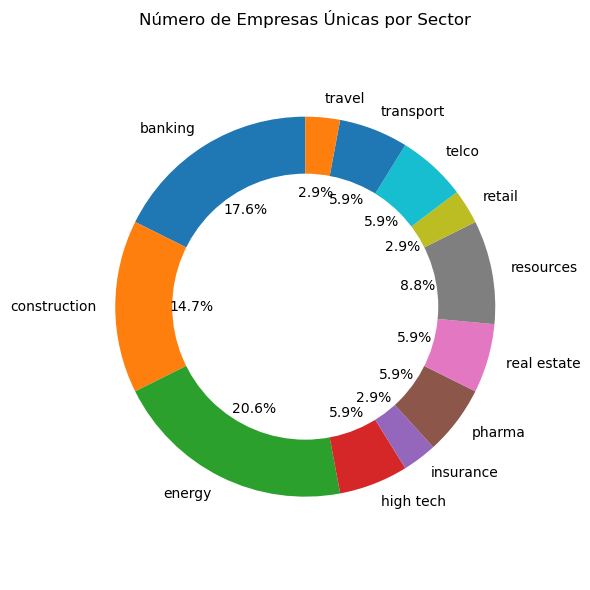

In [12]:
unique_companies_by_sector = df.groupby('sector')['empresa'].nunique()

# Crear un gráfico de anillos
plt.figure(figsize=(6, 6))
plt.pie(unique_companies_by_sector, labels=unique_companies_by_sector.index, autopct='%1.1f%%', startangle=90)

# Añadir un círculo en el centro para convertirlo en un gráfico de anillos
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Ajustar aspectos visuales
plt.axis('equal')
plt.title('Número de Empresas Únicas por Sector')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [13]:
# Paso 10: Analizar los datos sin el efecto COVID

df_2021 = df[df['date'] >= '2021-01-01']

df_2021

,id,ticker,empresa,date,open,high,low,close,adj close,volume,sector
505,1,ANA,Acciona,2021-01-04,117.199997,118.099998,116.699997,116.699997,107.314598,0,construction
506,1,ANA,Acciona,2021-01-05,117.599998,117.900002,116.099998,116.599998,107.222633,0,construction
507,1,ANA,Acciona,2021-01-06,117.099998,119.400002,116.500000,119.400002,109.797455,0,construction
508,1,ANA,Acciona,2021-01-07,119.699997,126.199997,119.699997,125.900002,115.774712,0,construction
509,1,ANA,Acciona,2021-01-08,127.000000,128.600006,127.000000,127.800003,117.521904,0,construction
...,...,...,...,...,...,...,...,...,...,...,...
44000,35,UNI,Unicaja,2024-02-26,0.968000,0.976500,0.963500,0.972000,0.972000,4328467,banking
44001,35,UNI,Unicaja,2024-02-27,0.972000,0.976500,0.967500,0.975000,0.975000,3281814,banking
44002,35,UNI,Unicaja,2024-02-28,0.978000,0.978500,0.963500,0.963500,0.963500,3755004,banking
44003,35,UNI,Unicaja,2024-02-29,0.963500,0.966000,0.938500,0.944500,0.944500,11302071,banking


C:\Users\javie\AppData\Local\Temp\ipykernel_12144\3034912700.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['date'] = pd.to_datetime(df_2021['date'])


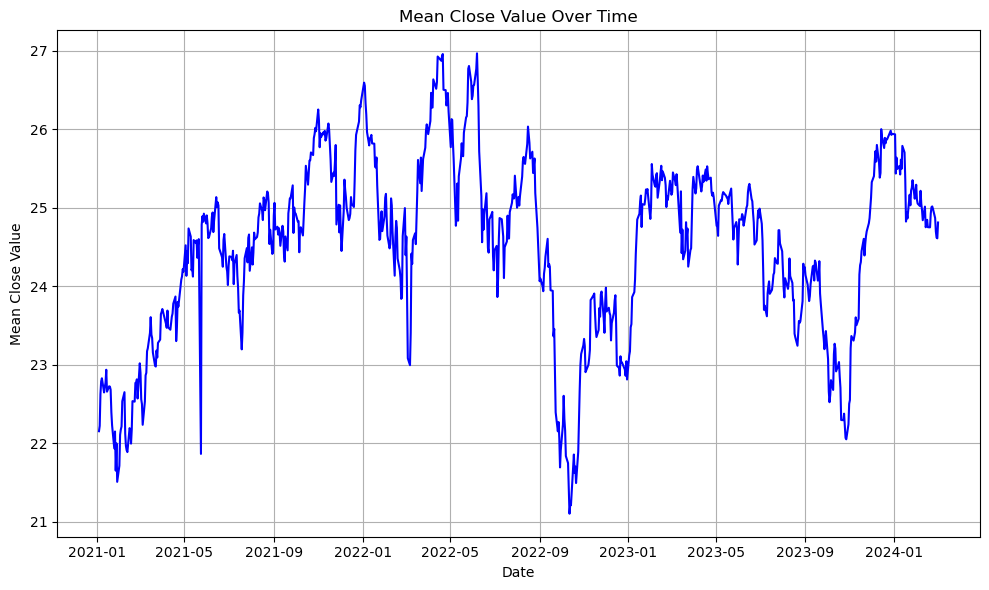

In [14]:
# Paso 11: Analizar le evolución temporal del valor de la acción en el Ibex35 (Post Covid)

df_2021['date'] = pd.to_datetime(df_2021['date'])

# Calcular la media de la columna 'close' por fecha
mean_close_by_date = df_2021.groupby('date')['close'].mean()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(mean_close_by_date, color='blue', marker='None', linestyle='-')

# Configuración de etiquetas y título
plt.xlabel('Date')
plt.ylabel('Mean Close Value')
plt.title('Mean Close Value Over Time')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [15]:
# Paso 12: Filtrar el DF para analizar de manera aislada los datos de Acciona

nombre_empresa = 'Acciona'
df_empresa_2021 = df_2021[df_2021['empresa'] == nombre_empresa]

df_empresa_2021


,id,ticker,empresa,date,open,high,low,close,adj close,volume,sector
505,1,ANA,Acciona,2021-01-04,117.199997,118.099998,116.699997,116.699997,107.314598,0,construction
506,1,ANA,Acciona,2021-01-05,117.599998,117.900002,116.099998,116.599998,107.222633,0,construction
507,1,ANA,Acciona,2021-01-06,117.099998,119.400002,116.500000,119.400002,109.797455,0,construction
508,1,ANA,Acciona,2021-01-07,119.699997,126.199997,119.699997,125.900002,115.774712,0,construction
509,1,ANA,Acciona,2021-01-08,127.000000,128.600006,127.000000,127.800003,117.521904,0,construction
...,...,...,...,...,...,...,...,...,...,...,...
1311,1,ANA,Acciona,2024-02-26,104.449997,104.449997,101.550003,101.550003,101.550003,0,construction
1312,1,ANA,Acciona,2024-02-27,101.349998,104.250000,101.150002,104.199997,104.199997,0,construction
1313,1,ANA,Acciona,2024-02-28,104.150002,104.150002,100.000000,100.300003,100.300003,0,construction
1314,1,ANA,Acciona,2024-02-29,100.500000,104.050003,100.500000,104.050003,104.050003,0,construction


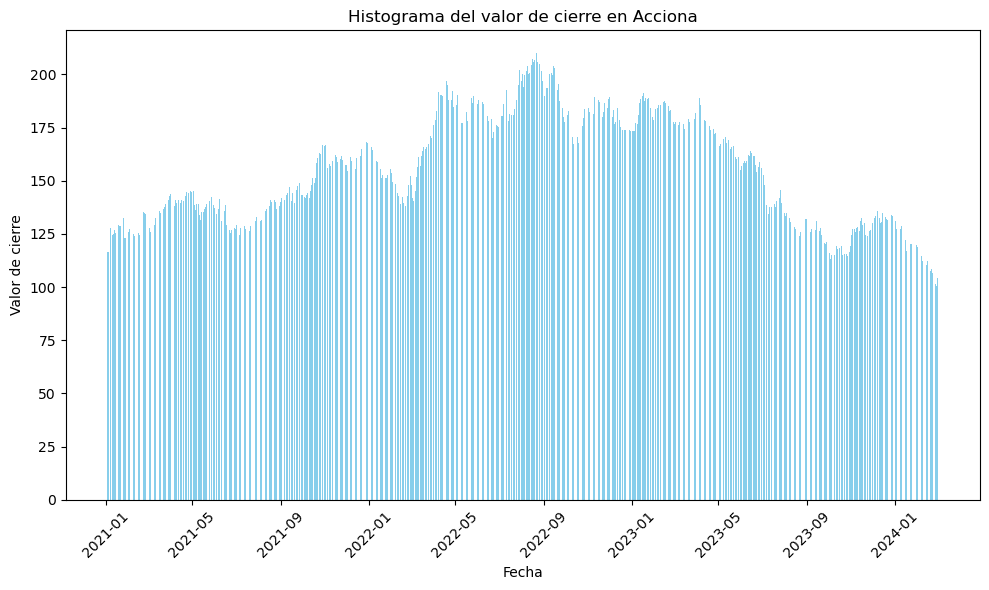

In [19]:
# Paso 13: Crear Histograma para ver la evolución de la acción de esta empresa

df_empresa_2021 = df_empresa_2021.sort_values('date')

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(df_empresa_2021['date'], df_empresa_2021['close'], color='skyblue')
plt.title('Histograma del valor de cierre en Acciona')
plt.xlabel('Fecha')
plt.ylabel('Valor de cierre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()